# Algorithmes sur les arbres

Dans ce classeur, nous allons mettre en oeuvre les algorithmes vus en cours. Nous partirons de deux classes (voir P1-4-poo_arbre) :

* Noeud permettant de décrire la structure d'un noeud dans un arbre binaire
* Arbrebin qui est l'arbre proprement dit. Il se caractérise par
    - sa racine qui est un Noeud
    - des méthodes que vous allez construire pour mettre le cours en pratique
    
Dans une deuxième partie, nous créerons une classe spécifique aux Arbres Binaires de Recherche et implémenterons une méthode d'insertion et de recherche dans ces arbres.

# Définition de la classe Noeud

In [1]:
class Noeud():
    """ Représente un noeud dans un arbre binaire
    - Propriétés :
        * valeur : valeur du noeud
        * gauche : fils gauche (type Noeud) ou None
        * droit  : fils droit (type Noeud) ou None
    - Méthode   :
        * __str__() : affichage de la valeur d'un noeud (print)
    """
    def __init__(self, valeur, gauche=None, droit=None):
        self.valeur = valeur
        assert gauche is None or isinstance(gauche, Noeud), "gauche doit être un Noeud !"
        assert droit is None or isinstance(droit, Noeud), "droit doit être un Noeud !"
        self.gauche = gauche
        self.droit = droit
        
    def __str__(self):
        """ la méthode __str__ redéfinit print(self) """
        return f"{self.valeur} (g[{self.valeur}] = {self.gauche}, d[{self.valeur}] = {self.droit})"

### Exemple d'utilisation :

In [2]:
n1 = Noeud('A')
print(n1)
n1.gauche = Noeud('B')
print(n1)
n1.droit = Noeud('C')
print(n1)

n2 = Noeud('a', Noeud('b'))
print(n2)

n3 = Noeud('a', 'b')
print(n3)

A (g[A] = None, d[A] = None)
A (g[A] = B (g[B] = None, d[B] = None), d[A] = None)
A (g[A] = B (g[B] = None, d[B] = None), d[A] = C (g[C] = None, d[C] = None))
a (g[a] = b (g[b] = None, d[b] = None), d[a] = None)


AssertionError: gauche doit être un Noeud !

# Définition de la classe Arbrebin

In [3]:
class Arbrebin:
    """ Représente un objet arbre binaire
    - Propriété : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * __str__() : affichage de l'arbre (print)
        * d'autres méthodes à compléter par la suite...
    """
    def __init__(self, racine=None):
        # Initialise l'arbre à vide par défaut, sinon avec un noeud passé en paramètre otionnel
        assert racine is None or isinstance(racine, Noeud), "racine doit être un Noeud !"
        self.racine = racine

    def __str__(self):
        """ la méthode __str__ redéfinit print(self) """
        return self.racine.__str__()

### Exemple d'utilisation :

On crée un noeud et ses descedants puis on crée un arbre avec ce noeud comme racine de l'arbre :

In [4]:
# définition d'un noeud et de ses descendants :
n = Noeud('A')

n.gauche = Noeud('B')
n.droit = Noeud('C')

n.gauche.gauche = Noeud('D')
n.droit.gauche = Noeud('E')
n.droit.droit = Noeud('F')

# création de l'arbre :
arbre = Arbrebin(n)

# affichage :
print(arbre)

A (g[A] = B (g[B] = D (g[D] = None, d[D] = None), d[B] = None), d[A] = C (g[C] = E (g[E] = None, d[E] = None), d[C] = F (g[F] = None, d[F] = None)))


### Pour faciliter la visualisation de l'arbre créé, on importe une fonction pour dessiner un arbre d'un module personnel.

In [5]:
from module_arbre import dessiner
help(dessiner)

Help on function dessiner in module module_arbre:

dessiner(arbre)
    Renvoie un objet graphviz pour la visualisation graphique d'un arbre binaire
    Arbre doit avoir l'attribut suivant :
    - racine : noeud racine de l'arbre (type Noeud)
    Noeud a 3 attributs :
    - valeur : étiquette du noeud
    - gauche : fils gauche (un noeud ou None)
    - droit : fils droit (un noeud ou None)



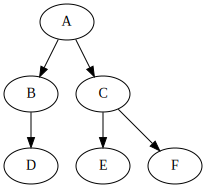

In [6]:
dessiner(arbre)

### Construction plus rapide...
Pour gagner du temps, on importe une autre fonction du module personnel permettant de constuire un arbre à partir d'une définition sous forme d'un tableau qui contient les étiquettes des noeuds de l'arbre, sous la forme :

    ["Noeud", [S_A_G], [S_A_D]]
    
On utilise cette méthode pour construire rapidement l'arbre vu comme exemple du cours :

In [7]:
from module_arbre import tableau2arbre
help(tableau2arbre)

Help on function tableau2arbre in module module_arbre:

tableau2arbre(tableau)
    Construit un arbre à partir d'un tableau du type ["Noeud", [S_A_G], [S_A_D]]
    [ ] désigne un arbre vide



A (g[A] = B (g[B] = C (g[C] = E (g[E] = None, d[E] = None), d[C] = None), d[B] = D (g[D] = None, d[D] = None)), d[A] = F (g[F] = G (g[G] = I (g[I] = None, d[I] = None), d[G] = None), d[F] = H (g[H] = J (g[J] = K (g[K] = None, d[K] = None), d[J] = None), d[H] = None)))


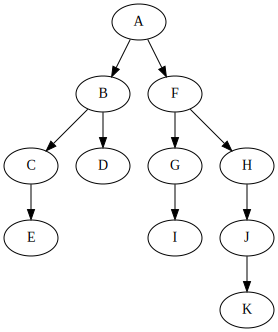

In [8]:
tableau = ['A', ['B', ['C', ['E']], ['D']], ['F', ['G', ['I']], ['H', ['J', ['K']]]]]

arbre = tableau2arbre(tableau)

print(arbre)
dessiner(arbre)

# Taille et Hauteur d'un arbre

Nous allons maintenant pouvoir ajouter nos premières méthodes personelles à la classe Arbrebin. Commençons par la taille de l'arbre.

Nous avons conçu un algorithme récursif en cours se fondant sur le principe que la taille d'un arbre est égal à :

        1 + la taille du Sous Arbre Gauche + la taille du Sous Arbre Droit. 

Voici une implémentation de cet algorithme dans la classe Arbrebin, elle vous servira de modèle pour les autres méthodes que vous aurez à implémenter dans ce TP.

***Remarque* : Nous créons une fonction *locale* taille_arbre qui n'est visible que dans la méthode taille. C'est cette fonction qui implémente en réalité l'algorithme, la méthode taille n'étant là que pour invoquer la fonction taille_arbre sur la racine de l'arbre.**

In [9]:
class Arbrebin:
    """ Représente un objet arbre binaire
    - Propriété : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * __str__() : affichage de l'arbre (print)
        * taille : renvoie la taille de l'arbre (nombre de noeuds)
        * d'autres méthodes à compléter par la suite...
    """
    def __init__(self, racine=None):
        # Initialise l'arbre à vide par défaut, sinon avec un noeud passé en paramètre otionnel
        assert racine is None or isinstance(racine, Noeud), "racine doit être un Noeud !"
        self.racine = racine

    def __str__(self):
        """ la méthode __str__ redéfinit print(self) """
        return self.racine.__str__()
    
    def taille(self):
        """ Renvoie la taille de l'arbre """
        def taille_arbre(noeud):
            # condition d'arrêt
            if noeud is None:
                return 0
            # Appel récursif
            return 1 + taille_arbre(noeud.gauche) + taille_arbre(noeud.droit)
        
        return taille_arbre(self.racine)

In [10]:
# Utilisation sur l'arbre exemple :
arbre = tableau2arbre(tableau)

arbre.taille()

11

## A vous de jouer :
En utilisant le même modèle que pour la taille, vous allez implémenter la méthode hauteur déterminant la hauteur de l'arbre.

On décide que la hauteur d'un arbre vide est nulle, et la hateur de la racine est donc 1.

Vous complèterez donc la cellule ci-dessous et vérifierez qu'elle passe bien le test.

In [11]:
class Arbrebin:
    """ Représente un objet arbre binaire
    - Propriété : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * __str__() : affichage de l'arbre (print)
        * taille : renvoie la taille de l'arbre (nombre de noeuds)
        * hauteur : renvoie la hauteur de l'arbre (hauteur nulle pour un arbre vide)
        * d'autres méthodes à compléter par la suite...
    """
    def __init__(self, racine=None):
        assert racine is None or isinstance(racine, Noeud), "racine doit être un Noeud !"
        self.racine = racine

    def __str__(self):
        """ la méthode __str__ redéfinit print(self) """
        return self.racine.__str__()
    
    def taille(self):
        """ Renvoie la taille de l'arbre """
        def taille_arbre(noeud):
            if noeud is None:
                return 0
            return 1 + taille_arbre(noeud.gauche) + taille_arbre(noeud.droit)
        
        return taille_arbre(self.racine)
    
    def hauteur(self):
        """Renvoie la hauteur de l'arbre"""
        def hauteur_arbre(noeud):
            # VOTRE CODE CI-DESSOUS
            if noeud is None:
            # condition d'arrêt
                return 0
            # Appel récursif
            return 1 + max(hauteur_arbre(noeud.gauche), hauteur_arbre(noeud.droit))
            # FIN DE CODE        
        return hauteur_arbre(self.racine)

In [12]:
# Cellule de tests
arbre = tableau2arbre(tableau)

assert arbre.hauteur() == 5

# Parcours en profondeur
Dans la cellule ci-dessous, on a ajouté une méthode permettant le **parcours en profondeur préfixe**.

Implémentez de même les parcours suffixe et infixe, puis validez votre travail grâce à la cellule de tests.

*Vous ferez attention de choisir les mêmes noms de méthodes que dans la cellule de test pour passer ces derniers avec succès.*

In [13]:
class Arbrebin:
    """ Représente un objet arbre binaire
    - Propriété : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * __str__() : affichage de l'arbre (print)
        * taille : renvoie la taille de l'arbre (nombre de noeuds)
        * hauteur : renvoie la hauteur de l'arbre (hauteur nulle pour un arbre vide)
        * parcours_prefixe : renvoie la liste des noeuds dans un parcours Prefixe
        * parcours_infixe : renvoie la liste des noeuds dans un parcours Infixe
        * parcours_suffixe : renvoie la liste des noeuds dans un parcours Suffixe
        * d'autres méthodes à compléter par la suite...
    """
    def __init__(self, racine=None):
        assert racine is None or isinstance(racine, Noeud), "racine doit être un Noeud !"
        self.racine = racine

    def __str__(self):
        """ la méthode __str__ redéfinit print(self) """
        return self.racine.__str__()
    
    def taille(self):
        """ Renvoie la taille de l'arbre """
        def taille_arbre(noeud):
            if noeud is None:
                return 0
            return 1 + taille_arbre(noeud.gauche) + taille_arbre(noeud.droit)
        
        return taille_arbre(self.racine)
    
    def hauteur(self):
        """Renvoie la hauteur de l'arbre"""
        def hauteur_arbre(noeud):
            if noeud is None:
                return 0
            return 1 + max(hauteur_arbre(noeud.gauche), hauteur_arbre(noeud.droit))
        return hauteur_arbre(self.racine)
    
    def parcours_prefixe(self):
        """Renvoie la liste des noeuds dans un parcours Prefixe"""
        def prefixe(noeud):
            # Condition d'arrêt
            if noeud is None:
                return []
            # Appel récursif et renvoi réponse
            # La valeur est insérée AVANT les appels
            return [noeud.valeur] + prefixe(noeud.gauche) + prefixe(noeud.droit)

        return prefixe(self.racine)
    
    # VOTRE CODE CI-DESSOUS (parcours suffixe et parcours infixe)
    def parcours_suffixe(self):
        """Renvoie la liste des noeuds dans un parcours suffixe"""
        def suffixe(noeud):
            # Condition d'arrêt
            if noeud is None:
                return []
            # Appel récursif et renvoi réponse
            # La valeur est insérée APRES les appels
            return suffixe(noeud.gauche) + suffixe(noeud.droit) + [noeud.valeur]

        return suffixe(self.racine)     
    
    def parcours_infixe(self):
        """Renvoie la liste des noeuds dans un parcours infixe"""
        def infixe(noeud):
            # Condition d'arrêt
            if noeud is None:
                return []
            # Appel récursif et renvoi réponse
            # La valeur est insérée ENTRE les appels
            return infixe(noeud.gauche) + [noeud.valeur] + infixe(noeud.droit)

        return infixe(self.racine)     

In [14]:
# Cellule de tests
arbre = tableau2arbre(tableau)

assert arbre.parcours_prefixe() == ['A', 'B', 'C', 'E', 'D', 'F', 'G', 'I', 'H', 'J', 'K']
assert arbre.parcours_suffixe() == ['E', 'C', 'D', 'B', 'I', 'G', 'K', 'J', 'H', 'F', 'A']
assert arbre.parcours_infixe() == ['E', 'C', 'B', 'D', 'A', 'I', 'G', 'F', 'K', 'J', 'H']

# Parcours en largeur

Pour finir, ajoutez à la classe Arbrebin la méthode parcours_largeur()

Vous vérifierez votre travail avec la cellule de tests. Il pourra être utile de revoir l'implémentation des files FIFO avec un tableau Python.

In [15]:
class Arbrebin:
    """ Représente un objet arbre binaire
    - Propriété : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * __str__() : affichage de l'arbre (print)
        * taille : renvoie la taille de l'arbre (nombre de noeuds)
        * hauteur : renvoie la hauteur de l'arbre (hauteur nulle pour un arbre vide)
        * parcours_prefixe : renvoie la liste des noeuds dans un parcours Prefixe
        * parcours_infixe : renvoie la liste des noeuds dans un parcours Infixe
        * parcours_suffixe : renvoie la liste des noeuds dans un parcours Suffixe
        * parcours_largeur : renvoie la liste des noeuds dans un parcours en largeur
    """
    def __init__(self, racine=None):
        assert racine is None or isinstance(racine, Noeud), "racine doit être un Noeud !"
        self.racine = racine

    def __str__(self):
        """ la méthode __str__ redéfinit print(self) """
        return self.racine.__str__()
    
    def taille(self):
        """ Renvoie la taille de l'arbre """
        def taille_arbre(noeud):
            if noeud is None:
                return 0
            return 1 + taille_arbre(noeud.gauche) + taille_arbre(noeud.droit)
        
        return taille_arbre(self.racine)
    
    def hauteur(self):
        """Renvoie la hauteur de l'arbre"""
        def hauteur_arbre(noeud):
            if noeud is None:
                return 0
            return 1 + max(hauteur_arbre(noeud.gauche), hauteur_arbre(noeud.droit))
        return hauteur_arbre(self.racine)
    
    def parcours_prefixe(self):
        """ Renvoie la liste des noeuds dans un parcours Prefixe """
        def prefixe(noeud):
            if noeud is None:
                return []
            return [noeud.valeur] + prefixe(noeud.gauche) + prefixe(noeud.droit)
        return prefixe(self.racine)
    
    def parcours_suffixe(self):
        """ Renvoie la liste des noeuds dans un parcours suffixe """
        def suffixe(noeud):
            if noeud is None:
                return []
            return suffixe(noeud.gauche) + suffixe(noeud.droit) + [noeud.valeur]
        return suffixe(self.racine)     
    
    def parcours_infixe(self):
        """ Renvoie la liste des noeuds dans un parcours infixe """
        def infixe(noeud):
            if noeud is None:
                return []
            return infixe(noeud.gauche) + [noeud.valeur] + infixe(noeud.droit)
        return infixe(self.racine)     
    
    # VOTRE CODE CI-DESSOUS (parcours en largeur à l'aide d'une file [pas de récursivité])
    # la file pourra être implémentée par une simple liste Python
    def parcours_largeur(self):
        """ Renvoie la liste des noeuds dans un parcours en largeur """
        arbre_liste = []
        file = [self.racine]
        while file != []:           # ou simplement while file
            noeud = file.pop(0)
            if noeud.gauche is not None:
                file.append(noeud.gauche)
            if noeud.droit is not None:
                file.append(noeud.droit)
            arbre_liste.append(noeud.valeur)
            
        return arbre_liste  

In [16]:
# Cellule de tests
arbre = tableau2arbre(tableau)

assert arbre.parcours_largeur() == ['A', 'B', 'F', 'C', 'D', 'G', 'H', 'E', 'I', 'J', 'K']

# Arbres Binaires de Recherche
*Rappel* : un Arbre Binaire de Recherhce est un arbre binaire particulier. Il est donc souhaitable que toutes les méthodes définies dans la classe Arbrebin soient aussi disponibles dans la classe Abr que nous allons créer.

Faire un copier/coller de ces dernières serait maladroit en POO. La structure d'objet nous offre un mécanisme particulièrement intéressant ici : la notion d'**héritage** (malheureusement hors programme, donc il n'est pas indispensable de retenir cette procédure au-delà de ce TP, même si nous allons l'utiliser par soucis "d'économies"). En faisant hériter notre classe Abr de la classe Arbrebin, toutes les méthodes d'Arbrebin seront disponibles pour Abr et nous n'aurons juste qu'à nous soucier des méthodes spécifiques aux arbres binaires de recherche.

## Insertion

Afin de pouvoir commencer à manipuler nos ABR, nous allons implémenter la méthode inserer. Cette méthode insère un noeud d'une certaine valeur dans l'arbre binaire de recherche.

Complétez la classe ci-dessous :

In [17]:
class ABR(Arbrebin):
    """ Arbre Binaire de Recherche
    Hérite de la classe Arbre binaire (toutes ses méthodes sont donc disponibles pour la classe Abr) 
    - Méthodes spécifiques :
        * inserer(valeur) : insère le noeud 'valeur' dans l'ABR.
    """
    def __init__(self):
        """A l'initialisation, notre arbre est vide"""
        self.racine = None
    
    def inserer(self, valeur):
        """ Insère valeur dans l'ABR """
        def inserer_noeud(noeud, valeur):
            # insère la valeur dans noeud et renvoie le noeud complété
            # VOTRE CODE CI-DESSOUS
            if noeud is None:
                return Noeud(valeur)
            elif valeur > noeud.valeur:
                return Noeud(noeud.valeur, noeud.gauche, inserer_noeud(noeud.droit, valeur))
            elif valeur < noeud.valeur:
                return Noeud(noeud.valeur, inserer_noeud(noeud.gauche, valeur), noeud.droit)
            else:
                assert False, "Pas de doublon dans un Arbre Binaire de Recherche "
            
            # FIN DE VOTRE CODE        
        self.racine = inserer_noeud(self.racine, valeur)

### Test d'utilisation :
Les cellules suivantes utilisent la méthode que vous venez d'implémenter pour créer un ABR contenant les chiffres de 0 à 9, insérés **dans un ordre aléatoire**.

Vérifiez avec son affichage graphique que l'arbre créé respecte bien les critères d'un arbre bianire de recherche.

In [18]:
from random import shuffle # pour la gestion de l'aléa

None
Insertion du chiffre 3
Insertion du chiffre 1
Insertion du chiffre 4
Insertion du chiffre 9
Insertion du chiffre 7
Insertion du chiffre 6
Insertion du chiffre 2
Insertion du chiffre 0
Insertion du chiffre 5
Insertion du chiffre 8
3 (g[3] = 1 (g[1] = 0 (g[0] = None, d[0] = None), d[1] = 2 (g[2] = None, d[2] = None)), d[3] = 4 (g[4] = None, d[4] = 9 (g[9] = 7 (g[7] = 6 (g[6] = 5 (g[5] = None, d[5] = None), d[6] = None), d[7] = 8 (g[8] = None, d[8] = None)), d[9] = None)))


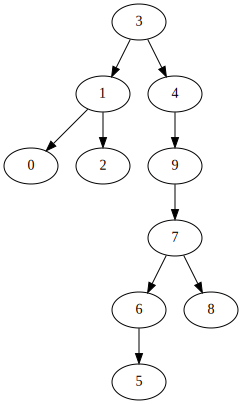

In [19]:
abr = ABR()  # création d'un ABR vide
print(abr)   # None attendu (arbre vide)

chiffres = [i for i in range(10)] # création des chiffres de 0 à 9 dans une liste en compréhension 
shuffle(chiffres)                 # on mélange cette liste

for chiffre in chiffres:          # insertion des chiffres dans l'ABR
    print(f"Insertion du chiffre {chiffre}")
    abr.inserer(chiffre)
    
print(abr)    
dessiner(abr)

On pourra vérifier au passage la magie de l'héritage (hors-programme) : toutes les méthodes définies dans la classe Abrebin sont disponibles pour la classe ABR (qui pourtant ne les a pas définies explicitement) :

In [20]:
print(abr.taille())
print(abr.hauteur())
print(abr.parcours_prefixe())
print(abr.parcours_infixe())
print(abr.parcours_suffixe())
print(abr.parcours_largeur())

10
6
[3, 1, 0, 2, 4, 9, 7, 6, 5, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 1, 5, 6, 8, 7, 9, 4, 3]
[3, 1, 4, 0, 2, 9, 7, 6, 8, 5]


# Recherche

Si vous exécutez plusieurs fois la cellule de création de l'ABR avec les chiffres de 0 à 9, vous obtiendrez des ABR différents qui pourtant contiennent tous les mêmes valeurs. Tout dépend de l'ordre d'insertion des valeurs !

La recherche dans un ABR (contenant les mêmes valeurs) pourra être plus ou moins efficace en fonction de sa construction.

La cellule suivante crée le pire ABR avec les chiffres de 0 à 9 : expliquez pourquoi.

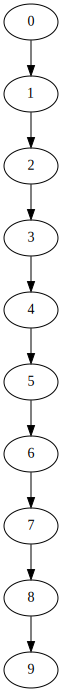

In [21]:
abr = ABR()
for chiffre in [i for i in range(10)]:
    abr.inserer(chiffre)
    
dessiner(abr)

# Recherche

Pour la suite de notre activité, nous changerons un peu et jouerons avec les termes d'une suite célèbre. Peut-être la reconnaîtrez-vous ! 

Commmençons par construire notre ABR, en insérant les valeurs de la suite dans un ordre aélatoire pour ne pas obtenir un arbre binaire de recherche linéaire (ce qui est stupide comme on vient de le voir).

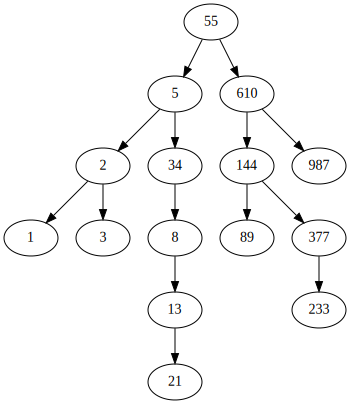

In [25]:
suite = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]
shuffle(suite)

abr = ABR()
for v in suite:
    abr.inserer(v)
dessiner(abr)

Vous allez maintenant terminer cette activité en implémentant la méthode **rechercher(valeur)** qui prend une valeur en paramètre et renvoie un booléen selon que la valeur est dans l'arbre ou non.

In [23]:
class ABR(Arbrebin):
    """ Arbre Binaire de Recherche
    Hérite de la classe Arbre binaire (toutes ses méthodes sont donc disponibles pour la classe Abr) 
    - Méthodes spécifiques :
        * inserer(valeur) : insère le noeud 'valeur' dans l'ABR.
        * rechercher(valeur) : renvoie True/False si la valeur est présente/ou non dans l'ABR
    """
    def __init__(self):
        """A l'initialisation, l'arbre est vide"""
        self.racine = None
    
    def inserer(self, valeur):
        """ Insère valeur dans l'ABR """
        def inserer_noeud(noeud, valeur):
            if noeud is None:
                return Noeud(valeur)
            elif valeur > noeud.valeur:
                return Noeud(noeud.valeur, noeud.gauche, inserer_noeud(noeud.droit, valeur))
            elif valeur < noeud.valeur:
                return Noeud(noeud.valeur, inserer_noeud(noeud.gauche, valeur), noeud.droit)
            else:
                assert False, "Pas de doublon dans un Arbre Binaire de Recherche "
            
        self.racine = inserer_noeud(self.racine, valeur)
        
    def rechercher(self, valeur):
        # VOTRE CODE CI-DESSOUS
        """ Recherche la présence d'une valeur dans un ABR """
        def cherche_val(noeud, valeur):
            if noeud is None:
                return False
            if valeur == noeud.valeur:
                return True
            elif valeur > noeud.valeur:
                return cherche_val(noeud.droit, valeur)
            else:
                return cherche_val(noeud.gauche, valeur)
            
        return cherche_val(self.racine, valeur)

Pour contôler le bon fonctionnement de cette méthode, exécutez de nouveau la cellule de création d'un ABR avec les nombres de la suite de Fibonacci (il faut recommencer la création de l'arbre pour tenir compte de la nouvelle méthode implentée).
Si vous obtenez un arbre trop déséquilibré (on peut ne pas avoir de chance...), re-exécutez la cellule  jusqu'à obtenir un arbre à peu près convenable pour la recherche.

In [26]:
# cellule de test:
print(abr.rechercher(233))
print(abr.rechercher(317))

True
False
